# Data Analysis

In [16]:
# Importing libraries
import os
import warnings
import csv
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## The Data

In [17]:
filename = "data.csv"
data = pd.read_csv(filename, parse_dates=[['Date', 'Time']], index_col = 'Date_Time')
data

,Inside Temperature (°C),Outside Temperature (°C),Weather Description,Nest Temperature (°C),Target Temperature (°C)
Date_Time,,,,,
12/26/2018 21:10,20.937,6.01,mist,22.5,15.5
12/26/2018 21:15,21.000,6.01,mist,22.5,15.5
12/26/2018 21:20,20.875,6.01,mist,22.5,15.5
12/26/2018 21:25,20.750,6.01,mist,22.5,15.5
12/26/2018 21:30,20.937,6.01,mist,22.5,15.5
12/26/2018 21:35,20.937,5.66,mist,22.5,15.5
12/26/2018 21:40,20.875,5.66,mist,22.5,15.5
12/26/2018 21:45,20.812,5.66,mist,22.5,15.5
12/26/2018 21:50,20.812,5.66,mist,22.0,15.5


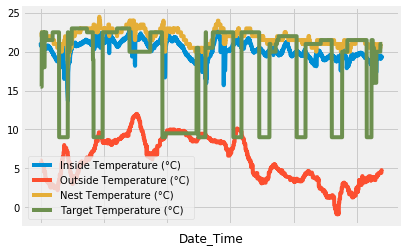

In [18]:
data.plot()

## Data Correlation|

In [19]:
print(data.corr())

                          Inside Temperature (°C)  Outside Temperature (°C)  \
Inside Temperature (°C)                  1.000000                  0.519563   
Outside Temperature (°C)                 0.519563                  1.000000   
Nest Temperature (°C)                    0.915228                  0.506612   
Target Temperature (°C)                  0.162930                 -0.146810   

                          Nest Temperature (°C)  Target Temperature (°C)  
Inside Temperature (°C)                0.915228                 0.162930  
Outside Temperature (°C)               0.506612                -0.146810  
Nest Temperature (°C)                  1.000000                 0.183666  
Target Temperature (°C)                0.183666                 1.000000  


## Reading the Data


In [20]:
# initializing the titles and rows list 
fields = [] 
rows = [] 
  
# reading csv file 
with open(filename, 'r') as csvfile: 
                 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader)
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
        
inside_temperatures = []
outside_temperatures = []
nest_temperatures = []
target_temperatures = []
datetime = []
weather = []

for row in rows:
    datetime.append(row[0] + " " + row[1])
    inside_temperatures.append(float(row[2]))
    outside_temperatures.append(float(row[3]))
    weather.append(row[4])
    nest_temperatures.append(float(row[5]))
    target_temperatures.append(float(row[6]))
    

## Data Averages

In [21]:
from collections import Counter

def Average_temperature(lst): 
    at = sum(lst) / len(lst)
    print("Average living room temperature = ",round(at),"\N{DEGREE SIGN}C")
     
def Common_weather(lst):
    c = Counter(weather)
    common = c.most_common(1)
    cw = common[0][0]
    print("Most common weather condition = ", cw.upper())

In [22]:
Average_temperature(inside_temperatures)    
Common_weather(weather)

Average living room temperature =  20 °C
Most common weather condition =  OVERCAST CLOUDS


## Comparing Temperatures

In [23]:
Nest_v_temperature = []
Desired_v_temperature = []
Nest_v_Desired = []

for i in range(len(datetime)):
    if round(nest_temperatures[i],1) == round(target_temperatures[i],1):
        a = "same"
    else:
        a = "different"
    Nest_v_Desired.append(a)

for i in range(len(datetime)):
    Nest_v_temperature.append((inside_temperatures[i]-nest_temperatures[i]))
    Desired_v_temperature.append((inside_temperatures[i]-target_temperatures[i]))
    Desired_v_temperature.append((inside_temperatures[i]-target_temperatures[i]))
    
def Average_difference(lst):
    ad = sum(lst) / len(lst)
    return(round(ad))


def Same_values(lst):
    c = Counter(lst)
    a = c.most_common()
    different = a[0][1]
    same = a[1][1]
    return round(same/len(lst)*100,1)

print("Percentage of the time that Nest recorded values match the target temperature values: ", Same_values(Nest_v_Desired), "%", '\n')
print("Average difference between Nest recorded temperature and living room temperature: ", Average_difference(Nest_v_temperature), "\N{DEGREE SIGN}C",'\n')
print("Average difference between target temperature and living room temperature: ", Average_difference(Desired_v_temperature), "\N{DEGREE SIGN}C",'\n')

Percentage of the time that Nest recorded values match the target temperature values:  17.0 % 

Average difference between Nest recorded temperature and living room temperature:  -2 °C 

Average difference between target temperature and living room temperature:  2 °C 

